# 팀 미니프로젝트 

 (연령별 코로나 확진자 수) 
-> 단계별 거리두기 증감량 
-> 코로나 전후 교통량 변화 
-> 거리두기 단계에 따른 교통량 증감량 
-> 대체 교통수단(==자전거) 단계별 증감량

ex) 코로나 증가 -> (버스,지하철) 감소 || 대체 교통수단(자전거) 증가


# 목차 

### * 코로나 단계별 거리두기, 모두의 안전을 위한 서울시 자치구 및 대중교통 분석
    - 소상공인 시위를 보면서 실제 코로나 단계별 거리두기를 시행했을때, 미치는 영향에 대해서 분석을 하고 싶었다.

#### 1. 데이터 분석을 통한 연령별 코로나 치명성 검증
    - 연령별 코로나 확진자 수
#### 2. 단계별 거리두기 시행에 따른 서울시 대중교통에 미치는 영향
    * 단계별 거리두기 증감량 
    * 코로나 전후 교통량 변화  
    * 거리두기 단계에 따른 교통량 증감량  
    * 대체 교통수단(==자전거) 단계별 증감량
#### 3.결론
    * 가설 검증
     * 가설1 : 단계별 거리두기를 시행하였을때, 높은 단계일수록 대중교통 이용량이  줄어들 것이다.(통계자료 토대로 결과 도출)
     * 가설2 : 단계별 거리두기를 시행 하였을때, 유동인구 수가 많은 지역에 코로나 감염자 수도 많을 것이다.
     * 가설3 : 단계별 거리두기를 시행하였을때, 높은 단계일수록 증감률 감소할 것이다. 
     * 가설4 : 연령별 대중교통 이용량 변화 
      - ex) 거리두기 단계가 올라갔을때 어떤한 연령층의 이용량이 증가하고 감소하였지 비교.
     *추가적으로 알아낸 것 
      - ex) 여성이 코로나 더 걸린다 ?

In [ ]:
# 주제선정 이유
 

## 1. 데이터 분석을 통한 연령별 코로나 치명성 검증
    1. 연령별 코로나 확진자 수
     - 시각화


## 2.단계별 거리두기 시행에 따른 서울시 대중교통에 미치는 영향
	1.단계별 거리두기 증감량 
	 - 시각화


	2.코로나 전후 교통량 변화  
	 - 시각화


       지하철역명     201901     201902     201903     201904     201905  \
1         가능   408269.0   360415.0   441626.0   447803.0   466217.0   
2       가락시장   581477.0   476898.5   571810.0   578547.5   576177.5   
3    가산디지털단지  1820009.5  1486330.5  1751577.0  1818532.0  1816731.5   
4         가양  1240173.0  1066246.0  1283286.0  1297995.0  1313715.0   
5        가오리   243259.0   210344.0   255978.0   253809.0   257418.0   
..       ...        ...        ...        ...        ...        ...   
518       화전    98447.0    87532.0   194254.0   194331.0   205378.0   
519       화정  1197560.0  1046059.0  1249513.0  1250283.0  1322889.0   
520       회기  1608640.0  1412653.0  1947913.0  1947514.0  2020976.0   
521       회룡   773871.0   673511.0   819120.0   832388.0   868583.0   
523    효창공원앞   287917.5   244488.0   318428.0   326302.5   329527.0   

        201906     201907     201908     201909  ...     202103     202104  \
1     432877.0   438369.0   421131.0   416399.0  ...   349526.0   350

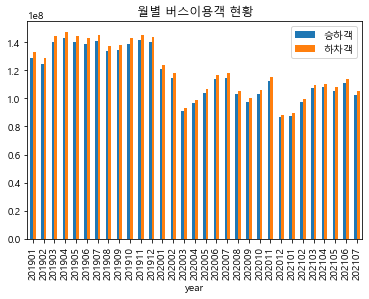

In [1]:
#지하철 이용량 증감량 시각화
import pandas as pd
df_i=pd.read_csv('C:/Users/user/Desktop/critical_shoot_project/01.source/01.데이터가공/02.데이터/서울지하철역좌표.csv')
df_n=pd.read_excel('C:/Users/user/Desktop/critical_shoot_project/01.source/01.데이터가공/02.데이터/지하철_선후불카드_이용객현황.xlsx')

#지하철역 좌표 불러오기
df_i=df_i.drop(['Unnamed: 0'],axis=1)
df_i.rename(columns={'지하철역':'지하철역명'},inplace=True)
df_i

#지하철역별 승하차 승객수 불러오기
df_n=df_n.drop(['Unnamed: 0'],axis=1)
df_n.rename(columns={'역명':'지하철역명'},inplace=True)
df_n['이용객수']=df_n['승차총객수']+df_n['하차총승객수']
df_n2=df_n.pivot_table(index='지하철역명',columns='사용월',values='이용객수')
df_n

#역좌표 및 승객수 합 및 연도별 평균 승객수 계산
df_ii=pd.merge(df_n2,df_i,on='지하철역명',how='left')
df_ii.dropna(inplace=True)
df_ii.reset_index()
df_iii=df_ii.sort_values(by=int(201901),ascending=False)
dff_2019=pd.concat([df_ii.iloc[:,0],df_ii.iloc[:,:13]],axis=1)
dff_2020=pd.concat([df_ii.iloc[:,0],df_ii.iloc[:,13:25]],axis=1)
dff_2021=pd.concat([df_ii.iloc[:,0],df_ii.iloc[:,25:-2]],axis=1)
df_ii['2021년평균']=dff_2021.mean(axis=1)
df_ii['2020년평균']=dff_2020.mean(axis=1)
df_ii['2019년평균']=dff_2019.mean(axis=1)
print(df_ii)

#월별 평균 지하철 이용객 시각화
df_mean=df_ii.iloc[:,:-2].mean()
df_month=pd.DataFrame(df_mean)
df_month.columns=['월별평균']
df_month_new=[]
for i in range(len(df_month.index)):
    df_month_new.append(str(df_month.index[i])[:4]+'-'+str(df_month.index[i])[4:])
df_month.index=df_month_new

import plotly.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

df_month.iplot(kind='area',title='월별 지하철이용객 현황')

#연도별 지하철이용객 추이
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

df_2019=df_ii.iloc[:,:13].mean()
df_2020=df_ii.iloc[:,13:25].mean()
df_2021=df_ii.iloc[:,25:-5].mean()
df_2019.mean()
df_2020.mean()
df_2021.mean()
df_year=pd.DataFrame({'연도별평균':[df_2019.mean(),df_2020.mean(),df_2021.mean()]},index=['2019년','2020년','2021년'])
df_year.iplot(kind='bar',title='연도별 지하철이용객 현황')

# 코로나 전후 시각화 비교(코로나 전 : 파랑색 원/코로나 후 : 빨강색 원)
import folium.plugins
m_k = folium.plugins.DualMap(location=[37.53, 126.96], zoom_start=11)

for k in df_ii.index :
    try:
        lon=df_ii.loc[k,'X좌표']
        lat=df_ii.loc[k,'Y좌표']      
        folium.CircleMarker(
            [lat,lon],
            radius=df_ii.loc[k,'2019년평균']/100000,
            popup=df_ii.loc[k,'지하철역명'],
            color='blue',
            weight=1.5,
            fill=True).add_to(m_k.m1)
    except:
        pass

for k in df_ii.index :
    try:
        lon=df_ii.loc[k,'X좌표']
        lat=df_ii.loc[k,'Y좌표']      
        folium.CircleMarker(
            [lat,lon],
            radius=df_ii.loc[k,'2020년평균']/100000,
            popup=df_ii.loc[k,'지하철역명'],
            color='red',
             title='2020년평균',
            weight=1.5,
            fill=True).add_to(m_k.m2)
    except:
        pass

m_k


#
import matplotlib
import pandas as pd

a=[]
b=[]
c=[]
for i in range(201901,201913):
    bus_i=pd.read_csv('C:/Users/user/Desktop/critical_shoot_project/02.team_project_data/서울시버스_이용현황/BUS_STATION_BOARDING_MONTH_'+str(i)+'.csv')
    a.append(i)
    b.append(sum(bus_i.iloc[:,4]))
    c.append(sum(bus_i.iloc[:,3]))
for i in range(202001,202013):
    bus_i=pd.read_csv('C:/Users/user/Desktop/critical_shoot_project/02.team_project_data/서울시버스_이용현황/BUS_STATION_BOARDING_MONTH_'+str(i)+'.csv')
    a.append(i)
    b.append(sum(bus_i.iloc[:,4]))
    c.append(sum(bus_i.iloc[:,3]))
for i in range(202101,202108):
    bus_i=pd.read_csv('C:/Users/user/Desktop/critical_shoot_project/02.team_project_data/서울시버스_이용현황/BUS_STATION_BOARDING_MONTH_'+str(i)+'.csv')
    a.append(i)
    b.append(sum(bus_i.iloc[:,4]))
    c.append(sum(bus_i.iloc[:,3]))

data={'year':a,'승하객':b, '하차객' :c}
bus_df=pd.DataFrame(data).set_index('year')

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

#월별 버스 이용객 시각화
bus_df.plot(kind='bar',title='월별 버스이용객 현황')

#가공 데이터 저장
bus_df.to_csv('C:/Users/user/Desktop/critical_shoot_project/01.source/01.데이터가공/02.데이터/월별 버스이용객수.csv', encoding='euc-kr')

    3.거리두기 단계에 따른 교통량 증감량  
    - 시각화


    4.대체 교통수단(==자전거) 단계별 증감량
     - 시각화


## 3.결론
    - 가설 검증
     * 가설1 : 단계별 거리두기를 시행하였을때, 높은 단계일수록 대중교통 이용량이  줄어들 것이다.(통계자료 토대로 결과 도출)
     * 가설2 : 단계별 거리두기를 시행 하였을때, 유동인구 수가 많은 지역에 코로나 감염자 수도 많을 것이다.
     * 가설3 : 단계별 거리두기를 시행하였을때, 높은 단계일수록 증감률 감소할 것이다. 
     * 가설4 : 연령별 대중교통 이용량 변화 
      - ex) 거리두기 단계가 올라갔을때 어떤한 연령층의 이용량이 증가하고 감소하였지 비교.
     * 추가적으로 알아낸 것 
      - ex) 여성이 코로나 더 걸린다 ?